In [30]:
import pandas as pd

In [31]:
data = pd.read_csv("adult.csv",header=0,index_col=False,
                  names=['age','workclass','fnlwgt','education','education-num',
                        'marital-status','occupation','relationship','race','gender',
                        'capital-gain','capital-loss','hours-per-week','native-country','income'])

In [32]:
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]

In [33]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
1,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
2,53,Private,11th,Male,40,Handlers-cleaners,<=50K
3,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
4,37,Private,Masters,Female,40,Exec-managerial,<=50K


In [34]:
print(data.gender.value_counts())

 Male      21789
 Female    10771
Name: gender, dtype: int64


### One Hot Encoding
- get_dummies -> 범주형 encoding

In [35]:
data_dummies = pd.get_dummies(data)

In [36]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,37,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
data_dummies.columns

Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
   

In [38]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
# Numpy array 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape:{} y.shape:{}".format(X.shape,y.shape))

X.shape:(32560, 44) y.shape:(32560,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Test score : {:.2f}".format(logreg.score(X_test,y_test)))

Test score : 0.81


In [40]:
# 숫자와 문자 특성을 띈 DataFrame 생성
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1],
                        '범주형 특성':['양말','여우','양말','상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [41]:
pd.get_dummies(demo_df) # 숫자 특성만 바뀌지 않음

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [42]:
# demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df,columns=['숫자 특성','범주형 특성'])) # 열을 명시하면 모두 범주형으로 간주

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


#### OneHotEncoder / ColumnTransformer

In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # Sparse Matrix가 아닌 Numpy Array return
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [44]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [46]:
ct = ColumnTransformer(
    [("scaling",StandardScaler(), ['age','hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False),
    ['workclass','education','gender','occupation'])])

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income 제외 모든열 추출
data_features = data.drop('income',axis=1)

X_train,X_test,y_train,y_test = train_test_split(
    data_features, data.income,random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


- pd.get_dummies 때처럼 44개 특성 생성

In [48]:
X_train_trans[0]

array([-0.33671637, -0.03803174,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train_trans,y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수 : {:.2f}".format(logreg.score(X_test_trans,y_test)))

테스트 점수 : 0.81


In [50]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

In [51]:
ct.named_transformers_.scaling

StandardScaler()

### make_column_transformer

In [52]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age','hours-per-week'],StandardScaler()),
    (['workclass','education','gender','occupation'],OneHotEncoder(sparse=False))
)

### 구간 분할 / 이산화

In [53]:
# 한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")


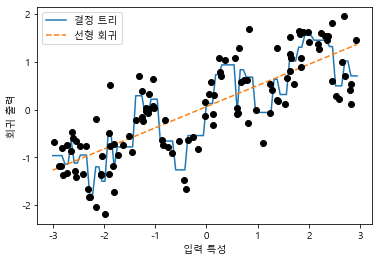

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

In [55]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [56]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [57]:
print(X[:10])
X_binned.toarray()[:10] # 각각의 array가 어느 구간에 속하는지 OHE

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [58]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense') # ohe 밀집 배열
kb.fit(X)
X_binned = kb.transform(X)

In [59]:
X_binned.shape

(120, 10)

Text(0.5, 0, '입력특성')

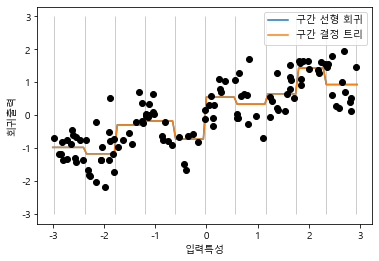

In [60]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned,y)
plt.plot(line, reg.predict(line_binned),label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line, reg.predict(line_binned),label='구간 결정 트리')
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0], -3, 3,linewidth=1,alpha=0.2)
plt.legend(loc='best')
plt.ylabel('회귀출력')
plt.xlabel('입력특성')

### interaction / polynomial 항 추가

In [61]:
X_binned.shape # (120, 10)
X.shape # (120, 1)

(120, 1)

In [62]:
X_combined = np.hstack([X,X_binned])
X_combined.shape

(120, 11)

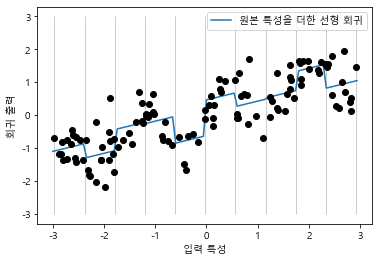

In [63]:
reg = LinearRegression().fit(X_combined,y)

line_combined = np.hstack([line,line_binned]) # 각각 (100,1) / (100,10)
plt.plot(line,reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0],-3,3, linewidth=1,alpha=0.2)
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0],y,'o',c='k')

In [64]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


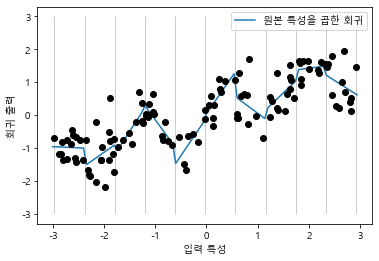

In [65]:
reg = LinearRegression().fit(X_product,y)

line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 회귀')

plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1,alpha=0.2)
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

In [66]:
from sklearn.preprocessing import PolynomialFeatures
# x**10 까지 고차항을 추가
# 기본값인 'include_bias=True' >> 절편에 해당하는 1인 특성을 추가
poly = PolynomialFeatures(degree=10, include_bias=False) # 절편항 제외
poly.fit(X)
X_poly = poly.transform(X)

In [67]:
print(X_poly.shape) # 10차원 이므로 10개의 특성

(120, 10)


In [68]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

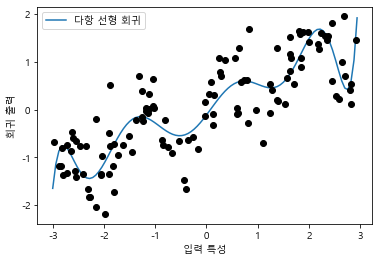

In [69]:
# 10차 다항 회귀
reg = LinearRegression().fit(X_poly,y)

line_poly = poly.transform(line)
plt.plot(line,reg.predict(line_poly),label='다항 선형 회귀')
plt.plot(X[:,0],y,'o',c='k')
plt.xlabel('입력 특성')
plt.ylabel('회귀 출력')
plt.legend(loc='best')

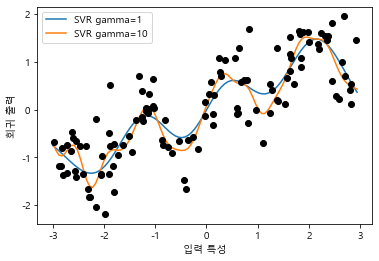

In [70]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0],y, 'o', c='k')
plt.xlabel('입력 특성')
plt.ylabel("회귀 출력")
plt.legend(loc='best')

In [71]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

- train data는 fit_transform, test data는 transform
- fit_transform은 train data로 학습된 Scaler()의 parameter들을 통해 test data가 scale 되는것
- transform은 traindata로 학습된 mean, variance를 test data에 적용하기 위해

- fit_transform을 test set에도 적용하면 우리 모델이 test data도 학습하는것

In [72]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train.shape)
print(X_train_poly.shape)
# 13개의 feature가 105개로

(379, 13)
(379, 105)


In [73]:
# interaction 항 유무에 따른 Ridge 성능 비교
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("no interaction score : {:.3f}".format(ridge.score(X_test_scaled,y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("interaction score : {:.3f}".format(ridge.score(X_test_poly,y_test)))


no interaction score : 0.621
interaction score : 0.753


interaction 항 포함했을떄 성능 향상 확인

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled,y_train)
print("no interaction score : {:.3f}".format(rf.score(X_test_scaled,y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly,y_train)
print("interaction score : {:.3f}".format(rf.score(X_test_poly,y_test)))

no interaction score : 0.795
interaction score : 0.775


rf 같은 복잡한 모델에서는 오히려 특성 추가 하지 않아도 성능 비슷하고, 다항식 추가시 성능 감소

### 일변량 비선형 변환

In [75]:
import matplotlib.pyplot as plt
import numpy as np
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
# np.dot -> array 곱 연산 
y = np.dot(X_org,w) # X_org * w
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [76]:
print('특성 출현 횟수:\n',np.bincount(X[:,0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0, 0.5, '출현 횟수')

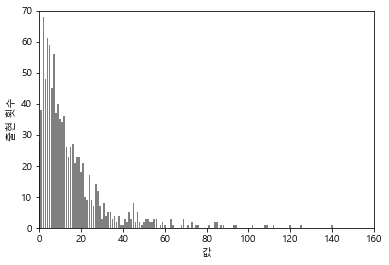

In [77]:
plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color='grey')
plt.xlabel("값")
plt.ylabel("출현 횟수")

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print('테스트 점수 : {:.3f}'.format(score))

테스트 점수 : 0.622


In [79]:
# log scaling을 통한 적합도 향상
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0, 0.5, '출현 횟수')

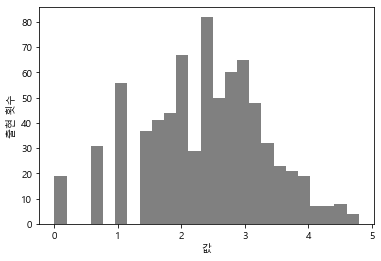

In [80]:
plt.hist(X_train_log[:,0], bins=25, color='gray')
plt.xlabel("값")
plt.ylabel("출현 횟수")

In [81]:
score = Ridge().fit(X_train_log,y_train).score(X_test_log, y_test)
print('log scale test score : {:.3f}'.format(score))

log scale test score : 0.875


훨씬 좋은 성능 보인다

### 특성 자동 선택

- 일변량 통계

In [82]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

# f_cassif >> 분류 기본값  / f_regression >> 회귀 기본값  << 일변량 분석 시 >>
# SelectPercentile >> 지정된 비율만큼 특성 선택
# SelectKBest >> 고정된 k개의 특성 선택

cancer = load_breast_cancer() 

# 고정 난수 발생
rng = np.random.RandomState(42)
noise = rng.normal(size= (len(cancer.data),50))

# 데이터에 노이즈 추가
# 처음 30개는 원본 특성, 다음 50개는 노이즈
X_w_noise = np.hstack([cancer.data, noise]) # (569,30) / (569,50)
print(cancer.data)
X_train,X_test,y_train,y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=0.5)

# SelectPercentile >> 지정된 비율만큼 특성 선택 
select = SelectPercentile(score_func = f_classif, percentile=50)
select.fit(X_train,y_train)

# train set에 적용
X_train_selected = select.transform(X_train)

print("X_train.shape:",X_train.shape)
print("X_train_selected.shape:",X_train_selected.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


특성 개수가 80개에서 40개로 줄어듬

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x1d60d8745b0>],
 <a list of 1 Text major ticklabel objects>)

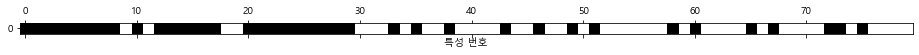

In [83]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])
# True는 검정색 False는 흰색

SelectPercentile이 선택한 특성
    - 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거

In [84]:
from sklearn.linear_model import LogisticRegression

# test data 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('전체 특성을 사용한 점수: {:.3f}'.format(lr.score(X_test,y_test)))
lr.fit(X_train_selected, y_train)
print("일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected,y_test)))

전체 특성을 사용한 점수: 0.919
일부 특성을 사용한 점수: 0.909


- 모델 기반 특성 선택

In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel( # 지정한 임계치보다 큰 모든 특성 선택
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median')

In [86]:
select.fit(X_train,y_train)
X_train_L1 = select.transform(X_train)
print("X_train.shape:",X_train.shape)
print("X_train_L1.shape:",X_train_L1.shape)

X_train.shape: (284, 80)
X_train_L1.shape: (284, 40)


임계치가 중앙값이었기 때문에 절반의 특성만 선택

Text(0.5, 0, '특성 번호')

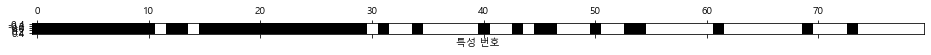

In [87]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('특성 번호') 

0~29 까지의 30개의 원본 특성 중 2개만 제외하고 선택됨

In [88]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_L1,y_train).score(X_test_l1,y_test)
print("test score: {:.3f}".format(score))

test score: 0.930


특성 선택이 더 잘돼서 성능이 좋아짐

- 반복적 특성 선택

feature의 수가 각기 다른 일련의 모델 생성

Text(0.5, 0, '특성 번호')

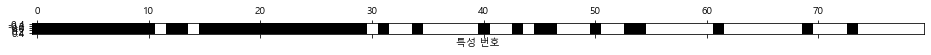

In [89]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
            n_features_to_select=40)
select.fit(X_train,y_train)

# 선택된 feature 표시
select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("특성 번호")

In [90]:
# RFE를 사용한 feature selection으로 만든 logistic Regression model
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe,y_test)
print("test score :{:.3f}".format(score))

test score :0.930


---------------------

- Newyork City Bike prediction

In [91]:
import mglearn
citibike = mglearn.datasets.load_citibike()
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

['토08-01', '일08-02', '월08-03', '화08-04', '수08-05', '목08-06']


Text(0, 0.5, '대여횟수')

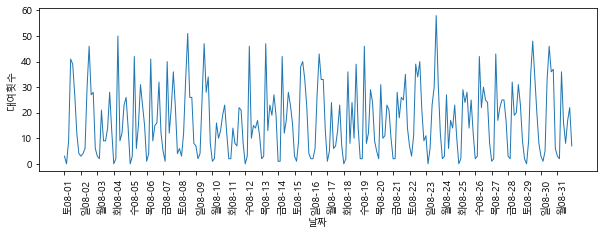

In [95]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start = citibike.index.min(), end = citibike.index.max(), freq='D')
week = ['일','월','화','수','목','금','토']
xticks_name = [week[int(w)]+d for w,d in zip(xticks.strftime('%w'), xticks.strftime("%m-%d"))]
print(xticks_name[:6]) # list comprehension 결과

plt.xticks(xticks, xticks_name, rotation = 90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('날짜')
plt.ylabel('대여횟수')